# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt


from datetime import datetime, timedelta
import kagglehub
import os

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

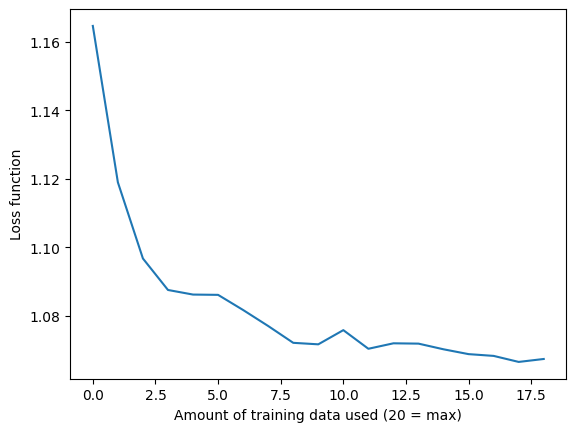

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [5]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

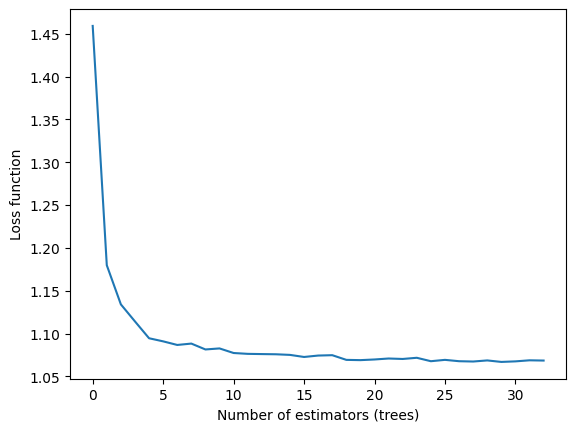

In [6]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

 I would recommend cutting the top plot and keeping the bottom plot.
 
 It's more interpretable, generalizable, and actionable.

"Amount of training data used (20 = max)" is not a standard or intuitive metric.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [7]:
def replace_values_in_column(df, column_name, to_replace, replacement):
    df_copy = df.copy()
    
    if to_replace is np.nan or pd.isna(to_replace):
        df_copy[column_name] = df_copy[column_name].fillna(replacement)
    else:
        df_copy[column_name] = df_copy[column_name].replace(to_replace, replacement)
        
    return df_copy

# df_cleaned = replace_values_in_column(df, 'Gender', '?', 'Unknown')
# df_cleaned = replace_values_in_column(df, 'authorities_contacted', np.nan, 'Unknown')

def drop_features(dataframe, columns_to_drop):
    initial_columns = dataframe.shape[1]
    # Drop each column gradually, using try-except to avoid errors if the column is missing
    for col in columns_to_drop:
        try:
            dataframe = dataframe.drop(columns=[col])
            print(f"Dropped column: {col}")
        except KeyError:
            print(f"Column {col} not found. Skipping.")
    final_columns = dataframe.shape[1]
    print(f"Number of columns to be dropped: {len(columns_to_drop)}")
    print(f"Number of columns before dropping: {initial_columns}")
    print(f"Number of columns after dropping: {final_columns}")
    return dataframe

def categorize_hour(hour):
    if 0 <= hour <= 5:
        return 'Night'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    elif 18 <= hour <= 21:
        return 'Evening'
    elif 22 <= hour <= 23:
        return 'Late Night'
    else:
        return 'Unknown'


In [8]:
# set variables
kaggle_dataset_path = "khusheekapoor/vehicle-insurance-fraud-detection"
kaggle_dataset_file_name = "carclaims.csv"
print(f"Path to kaggle dataset: {kaggle_dataset_path}")
print(f"Kaggle dataset file name: {kaggle_dataset_file_name}")

# download the data set
kaggle_dataset_local_path = kagglehub.dataset_download(kaggle_dataset_path)
print(f"Path to downloaded file: {kaggle_dataset_local_path}")

# read csv file to pandas dataframe
kaggle_dataset_local_path_to_file = os.path.join(kaggle_dataset_local_path, kaggle_dataset_file_name)
kaggle_dataset_raw = pd.read_csv(kaggle_dataset_local_path_to_file)

# copy dataframe for EDA
dataset = kaggle_dataset_raw.drop(columns=['PolicyNumber','RepNumber']).copy()

# shape 
print(f"This dataset contain {dataset.shape[0]} rows")
print(f"This dataset contain {dataset.shape[1]} columns")
# show top rows
dataset.head()


Path to kaggle dataset: khusheekapoor/vehicle-insurance-fraud-detection
Kaggle dataset file name: carclaims.csv
Path to downloaded file: C:\Users\serge\.cache\kagglehub\datasets\khusheekapoor\vehicle-insurance-fraud-detection\versions\1
This dataset contain 15420 rows
This dataset contain 31 columns


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [9]:
# add target feature as integer
dataset['FraudFound_Int'] = dataset['FraudFound'].map({'Yes': 1, 'No': 0})
# Summarize the datasets using describe()
dataset.describe().transpose()



columns_to_drop = ['FraudFound','Year']




dataset = drop_features(dataset, columns_to_drop)



Dropped column: FraudFound
Dropped column: Year
Number of columns to be dropped: 2
Number of columns before dropping: 32
Number of columns after dropping: 30


In [10]:
# Drop junk data: 

dataset = dataset[dataset["DayOfWeekClaimed"] != "0"]
# shape 
print(f"This dataset contain {dataset.shape[0]} rows")
print(f"This dataset contain {dataset.shape[1]} columns")

This dataset contain 15419 rows
This dataset contain 30 columns


In [11]:
# Encoding categorical/ranges - Manual ordinal encoding

# Deductible
deductible_ordinal_map = {300: 0, 400: 1, 500: 2, 700: 3}
dataset["Deductible_encoded"] = dataset["Deductible"].map(deductible_ordinal_map)

# Days: Policy-Accident and Policy-Claim
days_mapping = {
    "none": 0,
    "1 to 7": 1,
    "8 to 15": 2,
    "15 to 30": 3,
    "more than 30": 4
}
dataset["Days:Policy-Accident_Encoded"] = dataset["Days:Policy-Accident"].map(days_mapping)
dataset["Days:Policy-Claim_Encoded"] = dataset["Days:Policy-Claim"].map(days_mapping)

# PastNumberOfClaims
claims_mapping = {
    "none": 0,
    "1": 1,
    "2 to 4": 2,
    "more than 4": 3
}
dataset["PastNumberOfClaims_Encoded"] = dataset["PastNumberOfClaims"].map(claims_mapping)

# AgeOfVehicle
vehicle_age_mapping = {
    "new": 0,
    "2 years": 1,
    "3 years": 2,
    "4 years": 3,
    "5 years": 4,
    "6 years": 5,
    "7 years": 6,
    "more than 7": 7
}

# Apply mapping
dataset["AgeOfVehicle_Encoded"] = dataset["AgeOfVehicle"].map(vehicle_age_mapping)


In [12]:
# AgeOfPolicyHolder
age_mapping = {
    "16 to 17": 0,
    "18 to 20": 1,
    "21 to 25": 2,
    "26 to 30": 3,
    "31 to 35": 4,
    "36 to 40": 5,
    "41 to 50": 6,
    "51 to 65": 7,
    "over 65": 8
}

# Apply mapping
dataset["AgeOfPolicyHolder_Encoded"] = dataset["AgeOfPolicyHolder"].map(age_mapping)


In [13]:
# NumberOfSuppliments
suppliments_mapping = {
    "none": 0,
    "1 to 2": 1,
    "3 to 5": 2,
    "more than 5": 3
}

# Apply mapping
dataset["NumberOfSuppliments_Encoded"] = dataset["NumberOfSuppliments"].map(suppliments_mapping)


In [14]:
# AddressChange
address_change_mapping = {
    "no change": 0,
    "under 6 months": 1,
    "1 year": 2,
    "2 to 3 years": 3,
    "4 to 8 years": 4
}

# Apply mapping
dataset["AddressChange_Encoded"] = dataset["AddressChange-Claim"].map(address_change_mapping)


In [15]:
cars_mapping = {
    "1 vehicle": 0,
    "2 vehicles": 1,
    "3 to 4": 2,
    "5 to 8": 3,
    "more than 8": 4
}

# Apply mapping
dataset["NumberOfCars_Encoded"] = dataset["NumberOfCars"].map(cars_mapping)


In [16]:
# Manual ordinal mapping
vehicle_price_mapping = {
    "less than 20,000": 0,
    "20,000 to 29,000": 1,
    "30,000 to 39,000": 2,
    "40,000 to 59,000": 3,
    "60,000 to 69,000": 4,
    "more than 69,000": 5
}

# Apply mapping
dataset["VehiclePrice_Encoded"] = dataset["VehiclePrice"].map(vehicle_price_mapping)

In [17]:
# Approximate accident and claim dates in days (month as 30 days, week as 7-day step)
month_map = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4,
    "May": 5, "Jun": 6, "Jul": 7, "Aug": 8,
    "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}
# Convert month names to numbers
dataset["Month_int"] = dataset["Month"].map(month_map)
dataset["MonthClaimed_int"] = dataset["MonthClaimed"].map(month_map)


dataset["Accident_Day"] = (dataset["Month_int"] - 1) * 30 + (dataset["WeekOfMonth"] - 1) * 7
dataset["Claim_Day"] = (dataset["MonthClaimed_int"] - 1) * 30 + (dataset["WeekOfMonthClaimed"] - 1) * 7

# If claim date is earlier than accident date, assume it's in the next year (+365)
dataset.loc[dataset["Claim_Day"] < dataset["Accident_Day"], "Claim_Day"] += 365

# Calculate delay
dataset["ClaimDelay_Days"] = dataset["Claim_Day"] - dataset["Accident_Day"]

print(dataset[["Month_int", "WeekOfMonth", "MonthClaimed_int", "WeekOfMonthClaimed", "ClaimDelay_Days"]])

       Month_int  WeekOfMonth  MonthClaimed_int  WeekOfMonthClaimed  \
0             12            5                 1                   1   
1              1            3                 1                   4   
2             10            5                11                   2   
3              6            2                 7                   1   
4              1            5                 2                   2   
...          ...          ...               ...                 ...   
15415         11            4                11                   5   
15416         11            5                12                   1   
15417         11            5                12                   1   
15418         12            1                12                   2   
15419         12            2                12                   3   

       ClaimDelay_Days  
0                    7  
1                    7  
2                    9  
3                   23  
4                    9

In [18]:
columns_to_drop = ['Deductible','Days:Policy-Accident','Days:Policy-Claim','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','NumberOfSuppliments','AddressChange','NumberOfCars',"VehiclePrice"]
columns_to_drop = columns_to_drop + ["Accident_Day","Month","WeekOfMonth","Claim_Day","MonthClaimed","WeekOfMonthClaimed"]
columns_to_drop = columns_to_drop + ["Month_int", "MonthClaimed_int", "Claim_Day", "Accident_Day","Age"]  
columns_to_drop = columns_to_drop + ["AddressChange-Claim","DayOfWeek"]



dataset = drop_features(dataset, columns_to_drop)

Dropped column: Deductible
Dropped column: Days:Policy-Accident
Dropped column: Days:Policy-Claim
Dropped column: PastNumberOfClaims
Dropped column: AgeOfVehicle


Dropped column: AgeOfPolicyHolder
Dropped column: NumberOfSuppliments
Column AddressChange not found. Skipping.
Dropped column: NumberOfCars
Dropped column: VehiclePrice
Dropped column: Accident_Day
Dropped column: Month
Dropped column: WeekOfMonth
Dropped column: Claim_Day
Dropped column: MonthClaimed
Dropped column: WeekOfMonthClaimed
Dropped column: Month_int
Dropped column: MonthClaimed_int
Column Claim_Day not found. Skipping.
Column Accident_Day not found. Skipping.
Dropped column: Age
Dropped column: AddressChange-Claim
Dropped column: DayOfWeek
Number of columns to be dropped: 23
Number of columns before dropping: 45
Number of columns after dropping: 25


In [19]:
# Summarize the datasets using info()
dataset.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Index: 15419 entries, 0 to 15419
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Make                          15419 non-null  object
 1   AccidentArea                  15419 non-null  object
 2   DayOfWeekClaimed              15419 non-null  object
 3   Sex                           15419 non-null  object
 4   MaritalStatus                 15419 non-null  object
 5   Fault                         15419 non-null  object
 6   PolicyType                    15419 non-null  object
 7   VehicleCategory               15419 non-null  object
 8   DriverRating                  15419 non-null  int64 
 9   PoliceReportFiled             15419 non-null  object
 10  WitnessPresent                15419 non-null  object
 11  AgentType                     15419 non-null  object
 12  BasePolicy                    15419 non-null  object
 13  FraudFound_Int       

In [20]:
# Summarize the datasets using describe()
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DriverRating,15419.0,2.487840,1.119482,1.0,1.0,2.0,3.0,4.0
FraudFound_Int,15419.0,0.059861,0.237237,0.0,0.0,0.0,0.0,1.0
Deductible_encoded,15419.0,1.056878,0.308264,0.0,1.0,1.0,1.0,3.0
Days:Policy-Accident_Encoded,15419.0,3.972696,0.286269,0.0,4.0,4.0,4.0,4.0
Days:Policy-Claim_Encoded,15419.0,3.993644,0.095078,2.0,4.0,4.0,4.0,4.0
PastNumberOfClaims_Encoded,15419.0,1.334263,1.023565,0.0,0.0,1.0,2.0,3.0
AgeOfVehicle_Encoded,15419.0,5.606135,1.398975,0.0,5.0,6.0,7.0,7.0
AgeOfPolicyHolder_Encoded,15419.0,4.892211,1.395396,0.0,4.0,5.0,6.0,8.0
NumberOfSuppliments_Encoded,15419.0,1.175433,1.249113,0.0,0.0,1.0,3.0,3.0
AddressChange_Encoded,15419.0,0.242623,0.900100,0.0,0.0,0.0,0.0,4.0


In [21]:
# shape 
print(f"This dataset contain {dataset.shape[0]} rows")
print(f"This dataset contain {dataset.shape[1]} columns")

# basic aggregates
data_profiling = dataset.select_dtypes(include=['number']).agg(['count', 'nunique', 'min', 'max']).transpose()
data_profiling

This dataset contain 15419 rows
This dataset contain 25 columns


,count,nunique,min,max
DriverRating,15419,4,1,4
FraudFound_Int,15419,2,0,1
Deductible_encoded,15419,4,0,3
Days:Policy-Accident_Encoded,15419,5,0,4
Days:Policy-Claim_Encoded,15419,3,2,4
PastNumberOfClaims_Encoded,15419,4,0,3
AgeOfVehicle_Encoded,15419,8,0,7
AgeOfPolicyHolder_Encoded,15419,9,0,8
NumberOfSuppliments_Encoded,15419,4,0,3
AddressChange_Encoded,15419,5,0,4


Categorical features: Index(['Make', 'AccidentArea', 'DayOfWeekClaimed', 'Sex', 'MaritalStatus',
       'Fault', 'PolicyType', 'VehicleCategory', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'BasePolicy'],
      dtype='object')
Categorical features: <class 'pandas.core.indexes.base.Index'>


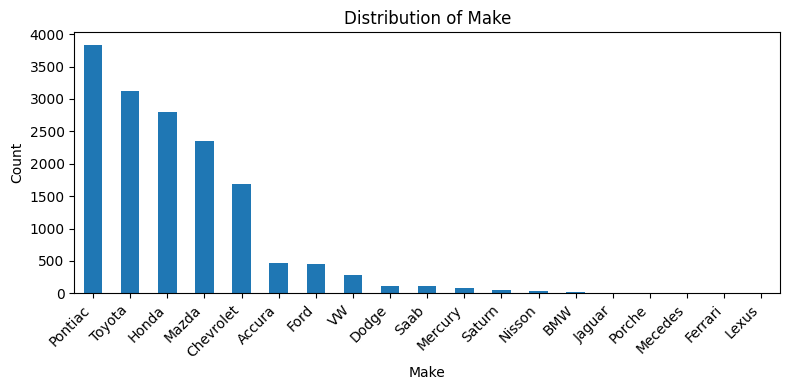

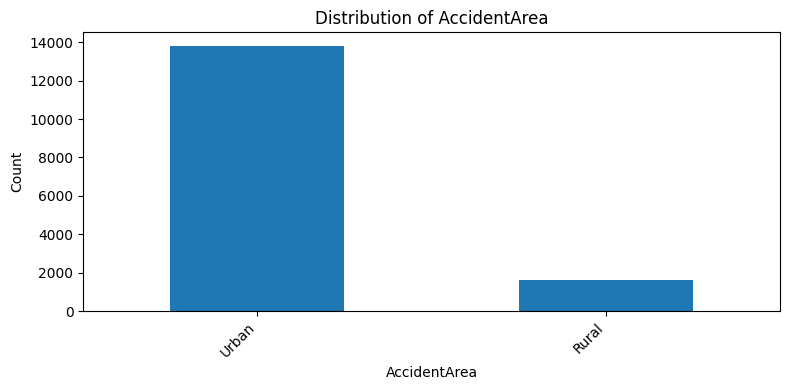

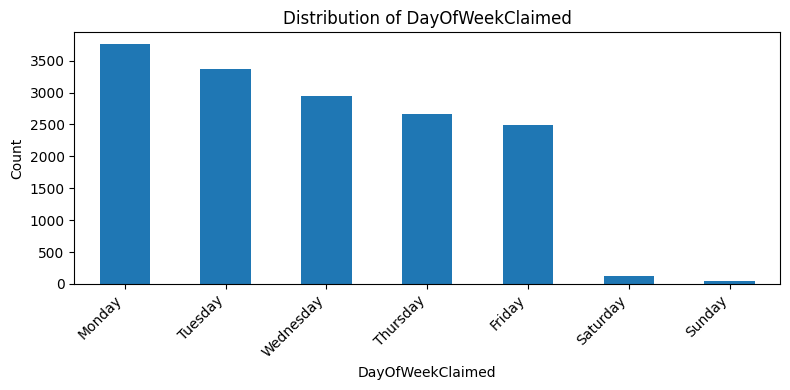

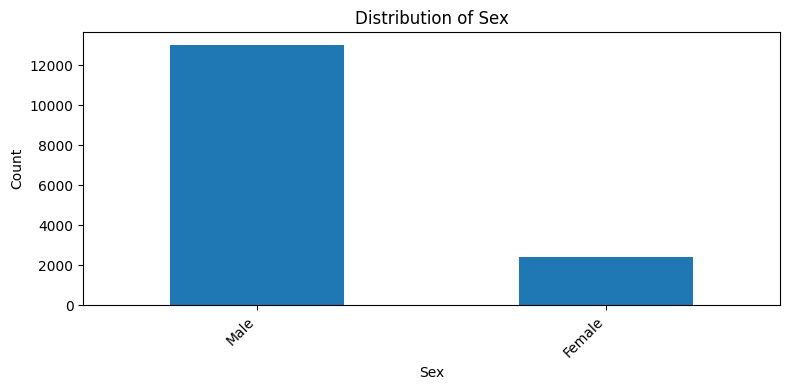

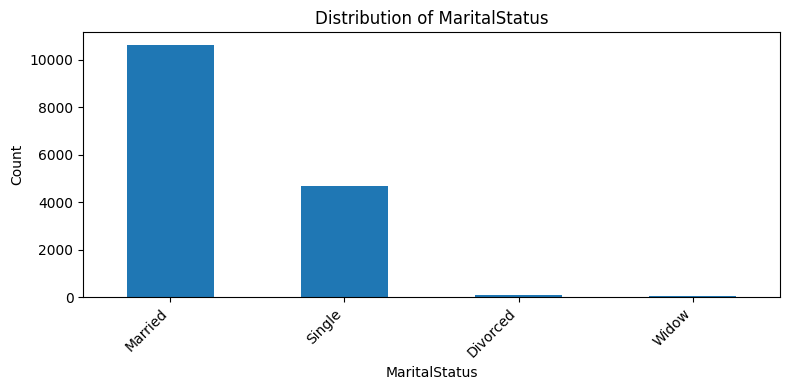

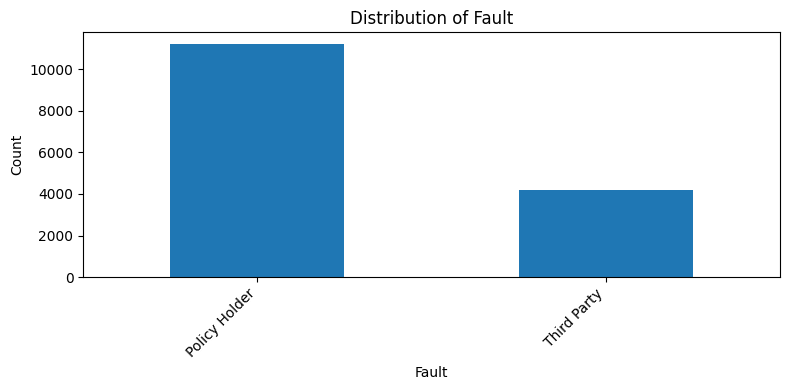

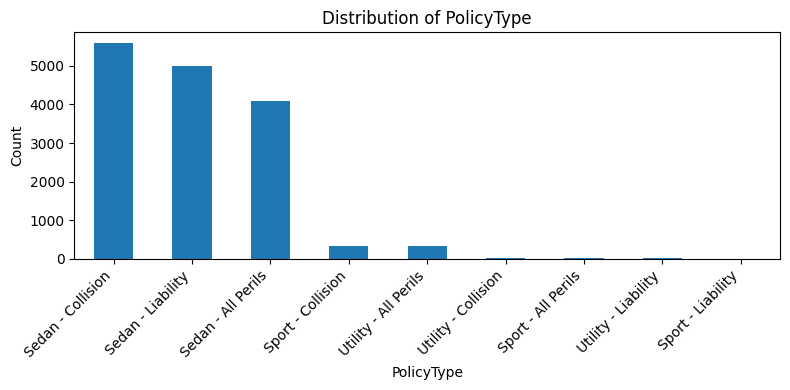

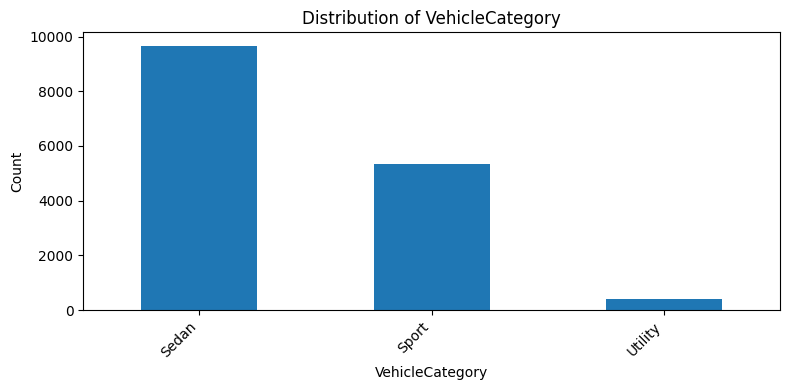

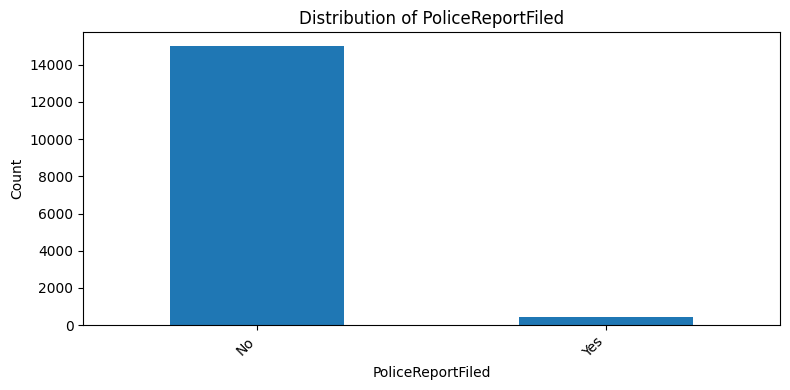

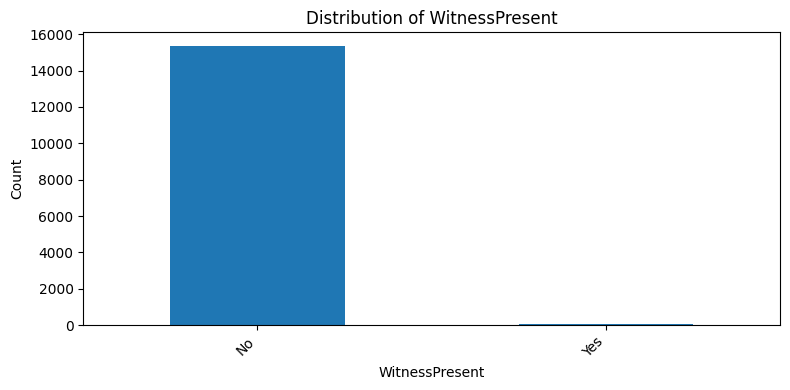

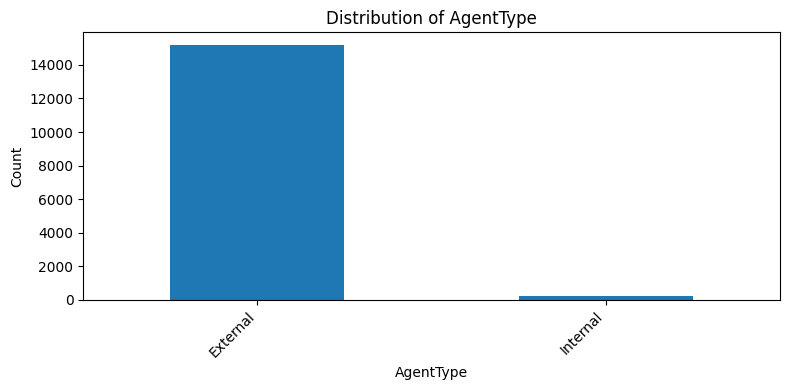

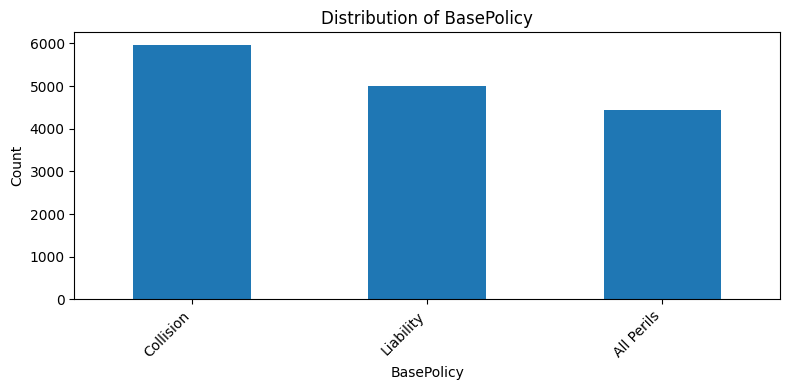

In [22]:
cat_features = dataset.select_dtypes(include=['object', 'category']).columns

print(f"Categorical features: {cat_features}")
print(f"Categorical features: {type(cat_features)}")


# Step 2: Plot distribution of each categorical feature
for col in cat_features:
    plt.figure(figsize=(8, 4))
    dataset[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



Categorical features: Index(['Make', 'AccidentArea', 'DayOfWeekClaimed', 'Sex', 'MaritalStatus',
       'Fault', 'PolicyType', 'VehicleCategory', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'BasePolicy'],
      dtype='object')
Categorical features: <class 'pandas.core.indexes.base.Index'>


<Figure size 800x400 with 0 Axes>

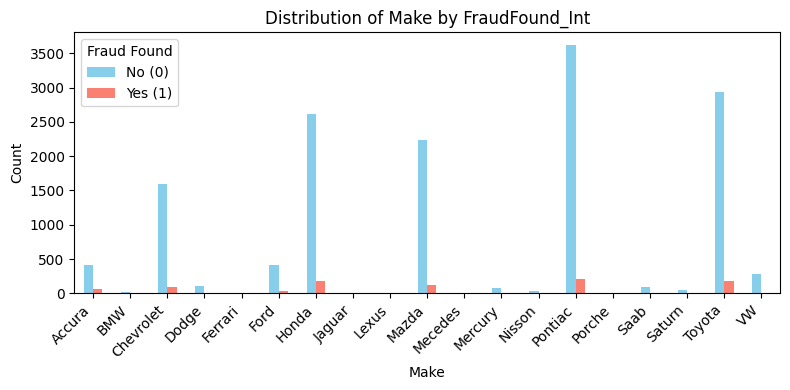

<Figure size 800x400 with 0 Axes>

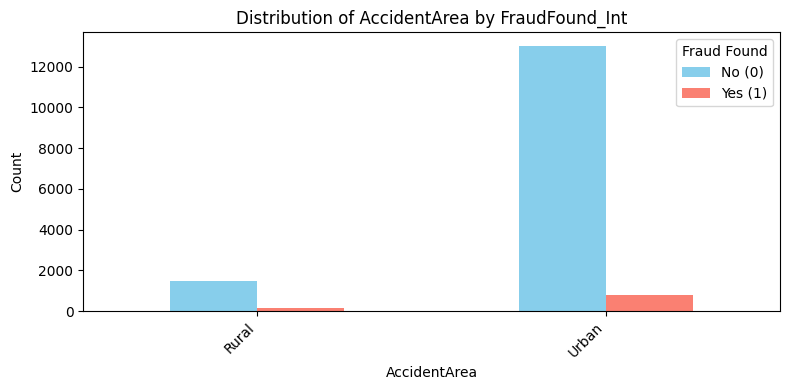

<Figure size 800x400 with 0 Axes>

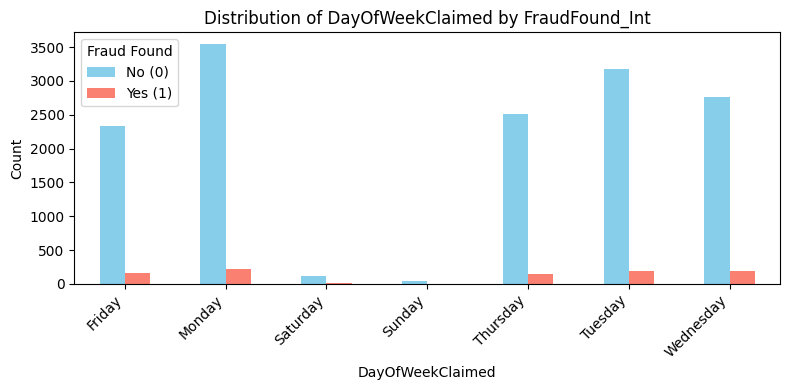

<Figure size 800x400 with 0 Axes>

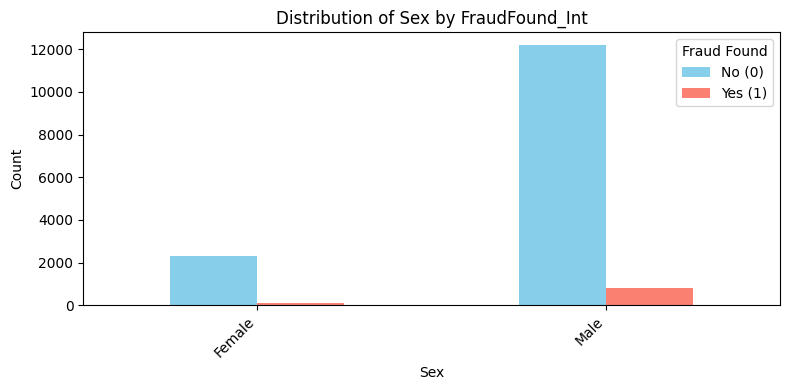

<Figure size 800x400 with 0 Axes>

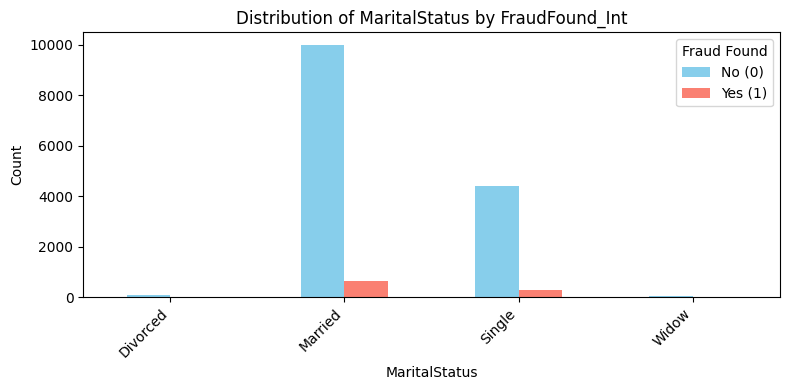

<Figure size 800x400 with 0 Axes>

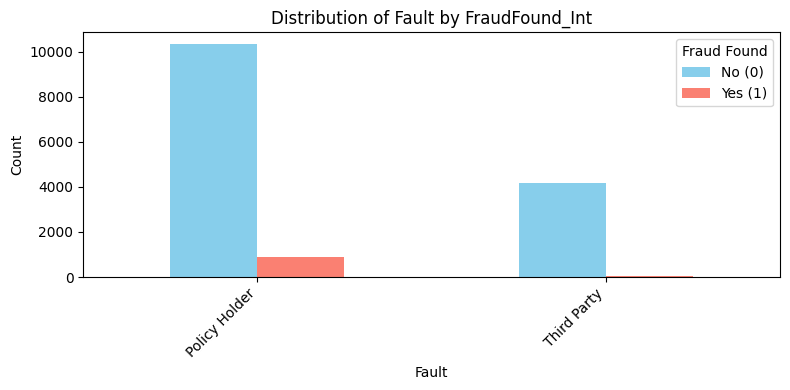

<Figure size 800x400 with 0 Axes>

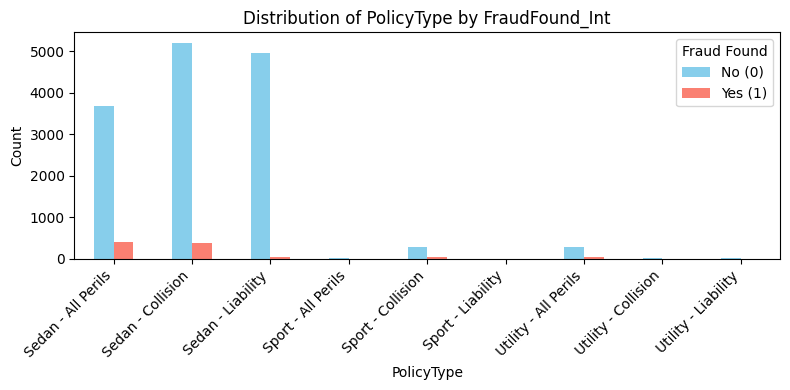

<Figure size 800x400 with 0 Axes>

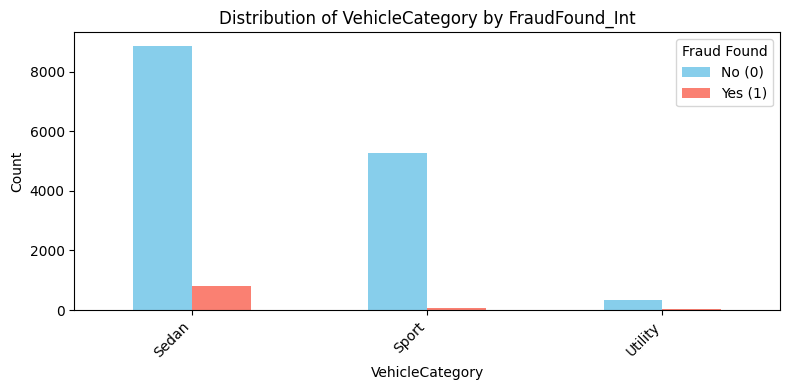

<Figure size 800x400 with 0 Axes>

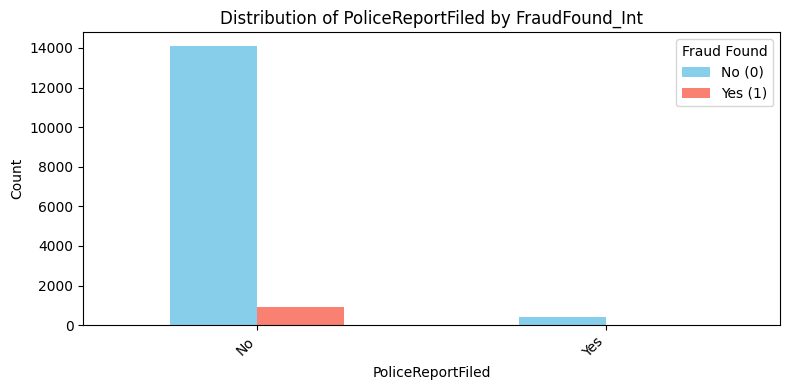

<Figure size 800x400 with 0 Axes>

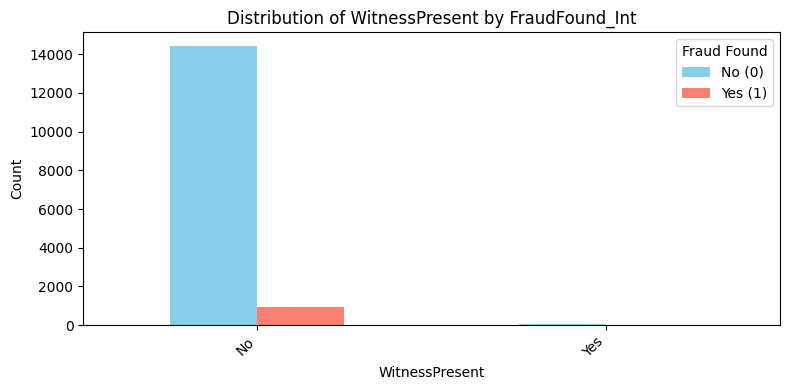

<Figure size 800x400 with 0 Axes>

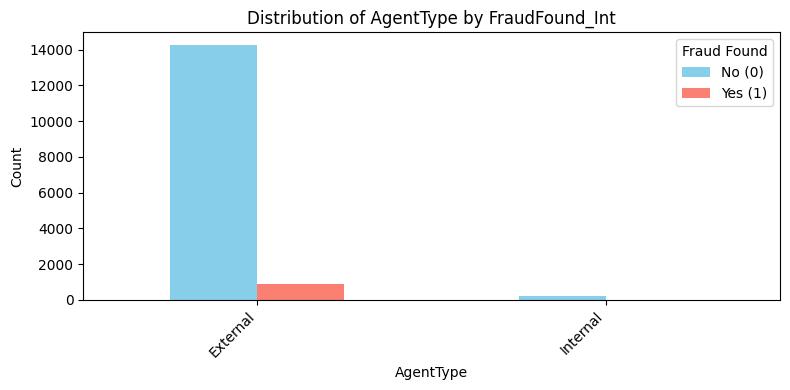

<Figure size 800x400 with 0 Axes>

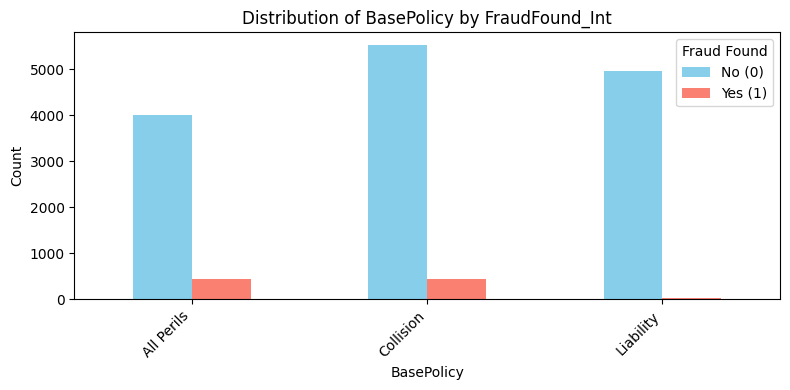

In [23]:
import matplotlib.pyplot as plt

# Step 1: Get categorical features
cat_features = dataset.select_dtypes(include=['object', 'category']).columns

print(f"Categorical features: {cat_features}")
print(f"Categorical features: {type(cat_features)}")

# Step 2: Plot distributions split by 'FraudFound_int'
for col in cat_features:
    plt.figure(figsize=(8, 4))
    
    # Group by categorical column and target
    grouped = dataset.groupby([col, 'FraudFound_Int']).size().unstack(fill_value=0)
    
    # Plot grouped bar chart
    grouped.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], figsize=(8, 4))
    
    plt.title(f'Distribution of {col} by FraudFound_Int')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Fraud Found', labels=['No (0)', 'Yes (1)'])
    plt.tight_layout()
    plt.show()


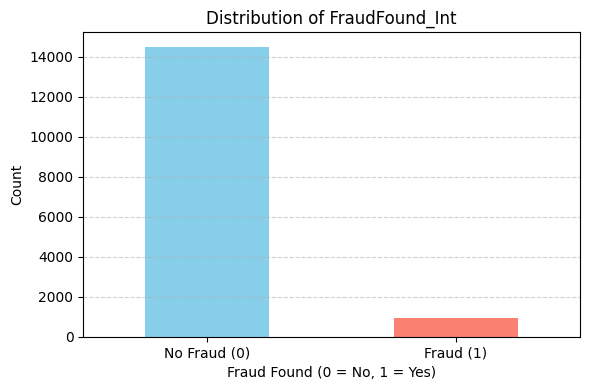

In [24]:
# Plot distribution
plt.figure(figsize=(6, 4))
dataset["FraudFound_Int"].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])

plt.title("Distribution of FraudFound_Int")
plt.xlabel("Fraud Found (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No Fraud (0)", "Fraud (1)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [25]:

cat_features = dataset.select_dtypes(include=['object', 'category']).columns
dataset_encoded = pd.get_dummies(dataset, columns=cat_features)

dataset_encoded[dataset_encoded.select_dtypes(include=['bool']).columns] = dataset_encoded.select_dtypes(include=['bool']).astype(int)

dataset_encoded.head()

,DriverRating,FraudFound_Int,Deductible_encoded,Days:Policy-Accident_Encoded,Days:Policy-Claim_Encoded,PastNumberOfClaims_Encoded,AgeOfVehicle_Encoded,AgeOfPolicyHolder_Encoded,NumberOfSuppliments_Encoded,AddressChange_Encoded,...,VehicleCategory_Utility,PoliceReportFiled_No,PoliceReportFiled_Yes,WitnessPresent_No,WitnessPresent_Yes,AgentType_External,AgentType_Internal,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,1,0,0,4,4,0,2,3,0,2,...,0,1,0,1,0,1,0,0,0,1
1,4,0,1,4,4,0,5,4,0,0,...,0,0,1,1,0,1,0,0,1,0
2,3,0,1,4,4,1,6,6,0,0,...,0,1,0,1,0,1,0,0,1,0
3,2,0,1,4,4,1,7,7,3,0,...,0,0,1,1,0,1,0,0,0,1
4,1,0,1,4,4,0,4,4,0,0,...,0,1,0,1,0,1,0,0,1,0


In [26]:
dataset_encoded.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 15419 entries, 0 to 15419
Data columns (total 70 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   DriverRating                     15419 non-null  int64
 1   FraudFound_Int                   15419 non-null  int64
 2   Deductible_encoded               15419 non-null  int64
 3   Days:Policy-Accident_Encoded     15419 non-null  int64
 4   Days:Policy-Claim_Encoded        15419 non-null  int64
 5   PastNumberOfClaims_Encoded       15419 non-null  int64
 6   AgeOfVehicle_Encoded             15419 non-null  int64
 7   AgeOfPolicyHolder_Encoded        15419 non-null  int64
 8   NumberOfSuppliments_Encoded      15419 non-null  int64
 9   AddressChange_Encoded            15419 non-null  int64
 10  NumberOfCars_Encoded             15419 non-null  int64
 11  VehiclePrice_Encoded             15419 non-null  int64
 12  ClaimDelay_Days                  15419 non-null  in

In [27]:
dataset_encoded.describe()


,DriverRating,FraudFound_Int,Deductible_encoded,Days:Policy-Accident_Encoded,Days:Policy-Claim_Encoded,PastNumberOfClaims_Encoded,AgeOfVehicle_Encoded,AgeOfPolicyHolder_Encoded,NumberOfSuppliments_Encoded,AddressChange_Encoded,...,VehicleCategory_Utility,PoliceReportFiled_No,PoliceReportFiled_Yes,WitnessPresent_No,WitnessPresent_Yes,AgentType_External,AgentType_Internal,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
count,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,...,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000
mean,2.487840,0.059861,1.056878,3.972696,3.993644,1.334263,5.606135,4.892211,1.175433,0.242623,...,0.025358,0.972242,0.027758,0.994358,0.005642,0.984370,0.015630,0.288475,0.386666,0.324859
std,1.119482,0.237237,0.308264,0.286269,0.095078,1.023565,1.398975,1.395396,1.249113,0.900100,...,0.157216,0.164284,0.164284,0.074906,0.074906,0.124043,0.124043,0.453068,0.487002,0.468337
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,4.000000,4.000000,0.000000,5.000000,4.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,4.000000,4.000000,1.000000,6.000000,5.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,1.000000,4.000000,4.000000,2.000000,7.000000,6.000000,3.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,4.000000,1.000000,3.000000,4.000000,4.000000,3.000000,7.000000,8.000000,3.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
print(dataset_encoded.isnull().sum()[dataset_encoded.isnull().sum() > 0])

Series([], dtype: int64)


In [ ]:
target_column = 'FraudFound_Int'
# ---------------------------------------------------
X = dataset_encoded.drop(target_column, axis=1)
y = dataset_encoded[target_column]

# Identify numeric columns
numeric_cols = X.select_dtypes(include=[np.number]).columns

# Separate binary and continuous numeric columns
binary_cols = [col for col in numeric_cols if X[col].dropna().isin([0, 1]).all()]
continuous_cols = [col for col in numeric_cols if col not in binary_cols]

# ---------------------------------------------------
# Step 2: Define preprocessing pipeline
# ---------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), continuous_cols),
        ('passthrough', 'passthrough', binary_cols)
    ]
)

# ---------------------------------------------------
# Step 3: Define models to evaluate
# ---------------------------------------------------
models = {
    'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'NaiveBayes': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier() #,     'XGBoost': XGBClassifier(eval_metric='logloss')
}

# ---------------------------------------------------
# Step 4: Evaluate models using pipeline
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('classifier', model)
    ])
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc')
    results[name] = {
        'ROC AUC (CV Mean)': scores.mean(),
        'ROC AUC (CV Std)': scores.std()
    }

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba)
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fraud', 'Fraud'])
    plt.figure(figsize=(5, 4))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

    results[name].update({
        'ROC AUC (Test Set)': auc,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score']
    })


# ---------------------------------------------------
# Step 5: Random Forest Hyperparameter Tuning
# ---------------------------------------------------
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

pipe_rf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

search = RandomizedSearchCV(pipe_rf, param_distributions=param_dist, n_iter=10,
                            cv=3, scoring='roc_auc', random_state=42, n_jobs=-1)
search.fit(X_train, y_train)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_proba)



results['BestRandomForest_Tuned'] = {
    'ROC AUC (Test Set)': roc_auc,
    'Precision': report['1']['precision'],
    'Recall': report['1']['recall'],
    'F1-Score': report['1']['f1-score']
}

# ---------------------------------------------------
# Step 6: Display results
# ---------------------------------------------------
results_df = pd.DataFrame(results).T

results_df


In [47]:
from sklearn.model_selection import learning_curve
 

def plot_learning_curve(model, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    
    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, label='Train AUC')
    plt.plot(train_sizes, test_mean, label='CV AUC')
    plt.xlabel("Training Size")
    plt.ylabel("AUC")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid(True)
    plt.show()


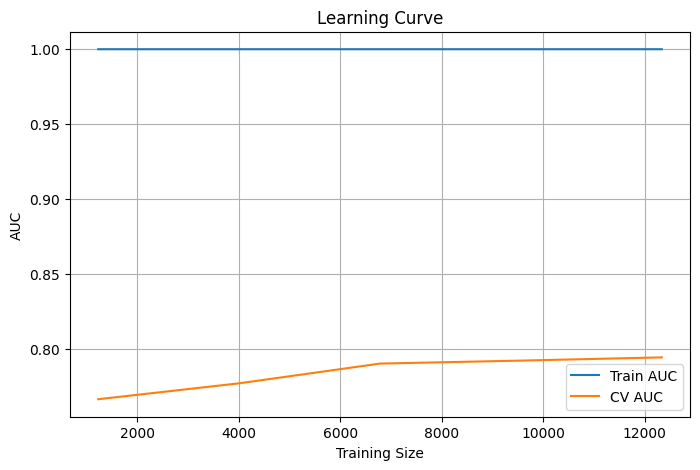

In [48]:
plot_learning_curve(RandomForestClassifier(), X, y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt


# Fit model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 20
print(importances_df.head(20).sort_values(by='Importance', ascending=False))


                        Feature  Importance
11              ClaimDelay_Days    0.099711
6     AgeOfPolicyHolder_Encoded    0.081111
0                  DriverRating    0.077244
5          AgeOfVehicle_Encoded    0.071802
4    PastNumberOfClaims_Encoded    0.068509
7   NumberOfSuppliments_Encoded    0.063152
10         VehiclePrice_Encoded    0.053841
34      DayOfWeekClaimed_Monday    0.024226
39   DayOfWeekClaimed_Wednesday    0.023718
37    DayOfWeekClaimed_Thursday    0.022508
38     DayOfWeekClaimed_Tuesday    0.022502
33      DayOfWeekClaimed_Friday    0.021712
8         AddressChange_Encoded    0.020259
25                 Make_Pontiac    0.019915
29                  Make_Toyota    0.019907
47            Fault_Third Party    0.018688
1            Deductible_encoded    0.018159
46          Fault_Policy Holder    0.017282
21                   Make_Mazda    0.017276
44         MaritalStatus_Single    0.017151


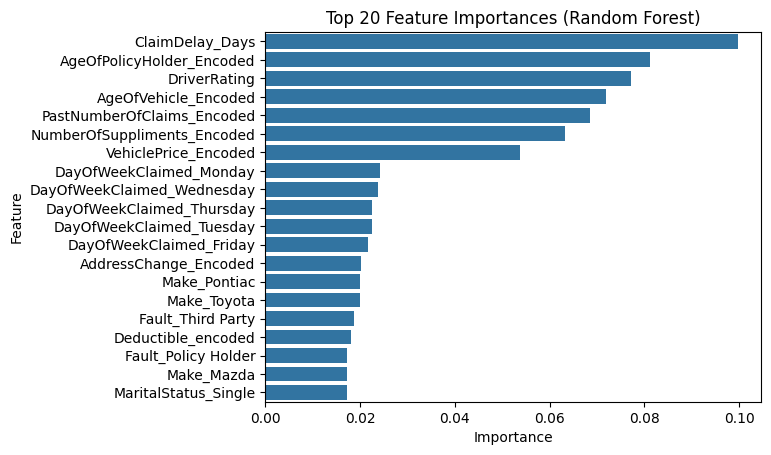

In [52]:

sns.barplot(data=importances_df.head(20), x='Importance', y='Feature')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.show()


# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

In [33]:
# No any graph there

![Alt Text](fig75.png)